In [1]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [3]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import mglearn
import pandas as pd
import numpy as np

%matplotlib inline

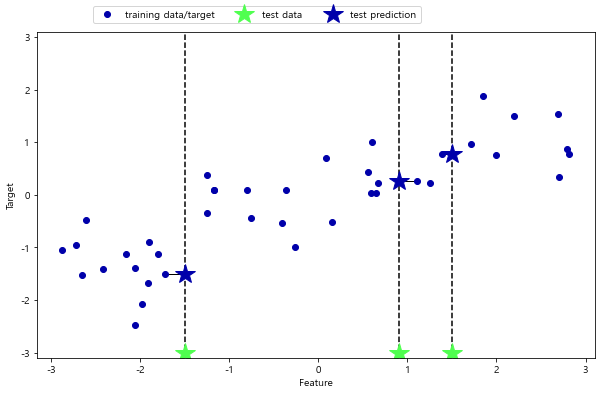

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

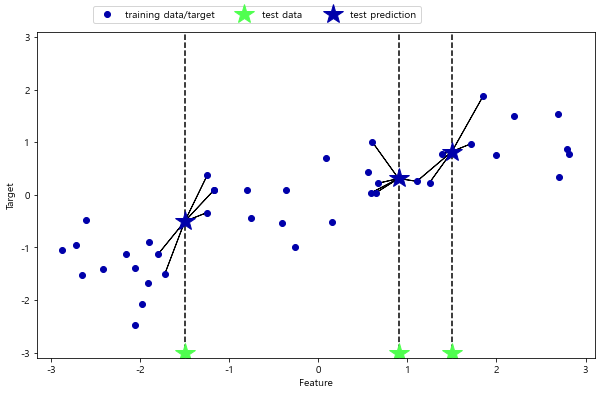

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

C:\Users\wnsau\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


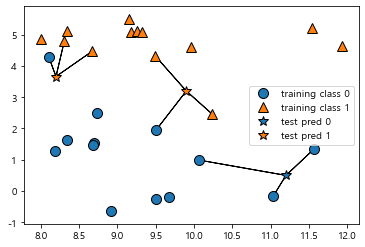

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\wnsau\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


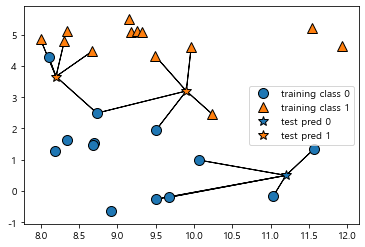

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
X.shape

(26, 2)

In [13]:
X[0:10], y[0:10]

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1]))

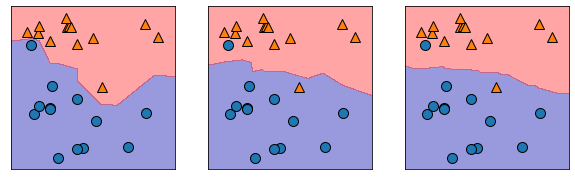

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                ax=axes[0], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])

clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                ax=axes[1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])

clf = KNeighborsClassifier(n_neighbors=9).fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                ax=axes[2], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[2])

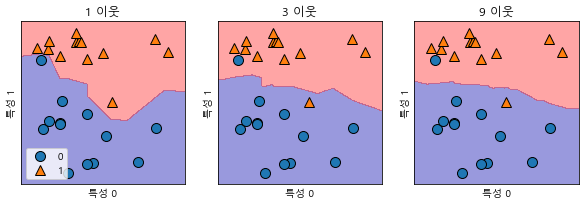

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### 실습
 * 01 데이터 나누기
 * 02 knn 모델 만들기
 * 03 모델 평가하기
 * 04 모델 개선하기

In [27]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [28]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 행열 : (569, 30)


In [30]:
print("특성이름(feature_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수: \n",np.bincount(cancer.target))

특성이름(feature_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수: 
 [212 357]


In [33]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [34]:
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=0)

In [51]:
y_1_all = (y == 1).sum()
y_0_all = (y == 0).sum()
y_train_1 = (y_train == 1).sum()
y_train_0 = len(y_train) - (y_train == 1).sum()

y_test_1 = (y_test ==1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print('y_train y_test => 1의 개수, 1의 개수', y_train_1, y_test_1)
print('y_train y_test => 0의 개수, 0의 개수', y_train_0, y_test_0)

## target의 확인
print('1: y_train:{}, y_test:{}, 비율 {}, {}'.format(y_train_1, y_test_1,
                                                  y_train_1/y_1_all, y_test_1/y_1_all))
print('0: y_train:{}, y_test:{}, 비율 {}, {}'.format(y_train_0, y_test_0,
                                                  y_train_0/y_0_all, y_test_0/y_0_all))

y_train y_test => 1의 개수, 1의 개수 267 90
y_train y_test => 0의 개수, 0의 개수 159 53
1: y_train:267, y_test:90, 비율 0.7478991596638656, 0.25210084033613445
0: y_train:159, y_test:53, 비율 0.75, 0.25


In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [43]:
(pred==y_test).sum()/len(pred)

0.9230769230769231

In [45]:
acc_tr = model.score(X_train, y_train) # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test) # 정확도(테스트 데이터)
acc_tr, acc_test

(0.9577464788732394, 0.9230769230769231)

In [62]:
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2) # 1,3,5~21
for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    #정확도 구하기
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    #정확도 값 저장
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
#     print('k:' ,n)
#     print("학습용셋 정확도 {:.3f}".format(acc_tr))
#     print("테스트용셋 정확도 {:.3f}".format(acc_test))
    print("k = %2d  score : %10f, score: %10f" % (n, acc_tr, acc_test))

k =  1  score :   1.000000, score:   0.916084
k =  3  score :   0.957746, score:   0.923077
k =  5  score :   0.941315, score:   0.937063
k =  7  score :   0.938967, score:   0.944056
k =  9  score :   0.936620, score:   0.958042
k = 11  score :   0.936620, score:   0.958042
k = 13  score :   0.934272, score:   0.958042
k = 15  score :   0.936620, score:   0.958042
k = 17  score :   0.929577, score:   0.958042
k = 19  score :   0.929577, score:   0.958042
k = 21  score :   0.924883, score:   0.951049


In [63]:
import seaborn as sns

In [64]:
dat = {'tr_acc':tr_acc, 'test_acc':test_acc}
data_df = pd.DataFrame(dat, index=range(1, 22, 2))
data_df

,tr_acc,test_acc
1,1.000000,0.916084
3,0.957746,0.923077
5,0.941315,0.937063
7,0.938967,0.944056
9,0.936620,0.958042
11,0.936620,0.958042
13,0.934272,0.958042
15,0.936620,0.958042
17,0.929577,0.958042
19,0.929577,0.958042


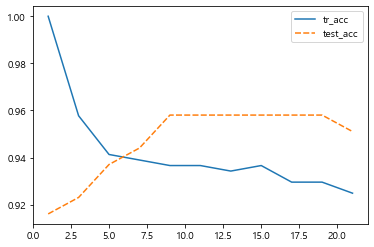

In [65]:
sns.lineplot(data=data_df, palette='tab10')
plt.show()

### 6-3 (추가) tips 데이터 셋에 대해서 학습용 점수, 테스트 점수를 그래프로 그려보자.
- total_bill, tip,  y=>size
- 적절한 k를 찾고, 점수(학습용, 테스트용)를 선그래프로 그려보기

In [66]:
tips = sns.load_dataset('tips')

In [67]:
from sklearn.model_selection import train_test_split

sel=['total_bill', 'tip']
X = tips[sel]
y = tips['size']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=0)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 2), (61, 2), (183,), (61,))

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 3, 2, 2, 4, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 3, 2, 2, 2, 2], dtype=int64)

In [71]:
acc_tr = model.score(X_train, y_train) # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test) # 정확도(테스트 데이터)
acc_tr, acc_test

(0.7650273224043715, 0.5901639344262295)

In [72]:
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2) # 1,3,5~21
for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    #정확도 구하기
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    #정확도 값 저장
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
#     print('k:' ,n)
#     print("학습용셋 정확도 {:.3f}".format(acc_tr))
#     print("테스트용셋 정확도 {:.3f}".format(acc_test))
    print("k = %2d  score : %10f, score: %10f" % (n, acc_tr, acc_test))

k =  1  score :   1.000000, score:   0.524590
k =  3  score :   0.765027, score:   0.590164
k =  5  score :   0.732240, score:   0.573770
k =  7  score :   0.721311, score:   0.557377
k =  9  score :   0.726776, score:   0.606557
k = 11  score :   0.710383, score:   0.622951
k = 13  score :   0.699454, score:   0.672131
k = 15  score :   0.704918, score:   0.639344
k = 17  score :   0.699454, score:   0.655738
k = 19  score :   0.688525, score:   0.655738
k = 21  score :   0.677596, score:   0.688525


In [73]:
dat = {'tr_acc':tr_acc, 'test_acc':test_acc}
data_df = pd.DataFrame(dat, index=range(1, 22, 2))
data_df

,tr_acc,test_acc
1,1.000000,0.524590
3,0.765027,0.590164
5,0.732240,0.573770
7,0.721311,0.557377
9,0.726776,0.606557
11,0.710383,0.622951
13,0.699454,0.672131
15,0.704918,0.639344
17,0.699454,0.655738
19,0.688525,0.655738


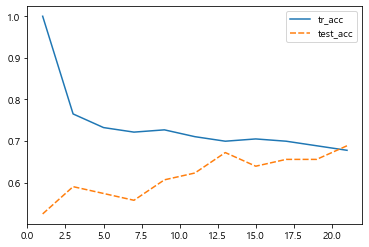

In [74]:
sns.lineplot(data=data_df, palette="tab10")
plt.show()